## Import Library & Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
prediction = pd.read_excel("../Data/LinkedinPredictionSet.xlsx", sheet_name = "TestSet")
profile = pd.read_excel("../Data/LinkedIn_profile.xlsx", sheet_name = "Sheet1")
add_info = pd.read_csv("../Data/addition_infor.csv")


In [3]:
prediction.head(5)

,Name,Social profiles,Linkedin Connect,Date Sent,Time Sent,Accepted,Time Accepted,Message Sent,Gender of Sender,City
0,Eric Bollin,https://www.linkedin.com/in/eric-bollin-816330...,v,10.13,10 - 10:45,NaN,NaN,NaN,F,"La Habra, California"
1,Ramona Guerra,https://www.linkedin.com/in/ramona-guerra-3795...,v,10.13,10 - 10:45,NaN,NaN,v,F,"Canyon Country, California"
2,Raul Mercado,https://www.linkedin.com/in/raul-mercado-433b0...,v,10.13,10 - 10:45,NaN,NaN,v,F,Greater Los Angeles Area
3,Lilyana Gonzalez,https://www.linkedin.com/in/lilyana-gonzalez-3...,v,10.12,6PM-9PM,v,6:46 PM,v,F,Greater Los Angeles Area
4,Gonzalo Huerta,https://www.linkedin.com/in/gonzalohuertapastr...,v,10.13,10 - 10:45,NaN,NaN,v,F,"Ventura, California"


In [4]:
profile.head(5)

,Name,Profile,Degree of Connection,Number of Connections,City,State,Schools,Years after Graduation,Number of Experiences,Months Worked for Most Recent Job,Volunteer Exp,Number of Enforsement
0,NaN,https://www.linkedin.com/in/eric-bollin-816330...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0
1,Ramona Guerra,https://www.linkedin.com/in/ramona-guerra-3795...,NaN,23.0,Canyon Country,California,NaN,NaN,1.0,NaN,No,11
2,Raul Mercado,https://www.linkedin.com/in/raul-mercado-433b0...,3rd,482.0,Greater Los Angeles Area,California,Rio Hondo College,NaN,4.0,44.0,Yes,10
3,Lilyana Gonzalez,https://www.linkedin.com/in/lilyana-gonzalez-3...,3rd,2.0,Greater Los Angeles Area,California,NaN,NaN,1.0,NaN,No,0
4,Gonzalo Huerta,https://www.linkedin.com/in/gonzalohuertapastr...,3rd,64.0,Ventura,California,CETIS #63 (Technological Research Center of In...,34.0,4.0,90.0,No,35


In [5]:
add_info.head(5)

,Unnamed: 0,link,image,activity
0,0,https://www.linkedin.com/in/eric-bollin-816330...,NaN,NaN
1,1,https://www.linkedin.com/in/ramona-guerra-3795...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",NaN
2,2,https://www.linkedin.com/in/raul-mercado-433b0...,https://media-exp1.licdn.com/dms/image/C4D03AQ...,NaN
3,3,https://www.linkedin.com/in/lilyana-gonzalez-3...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",NaN
4,4,https://www.linkedin.com/in/gonzalohuertapastr...,https://media-exp1.licdn.com/dms/image/C5603AQ...,NaN


In [6]:
# Check columns
prediction.columns, profile.columns, add_info.columns

(Index(['Name', 'Social profiles', 'Linkedin Connect', 'Date Sent', 'Time Sent',
        'Accepted', 'Time Accepted', 'Message Sent', 'Gender of Sender',
        'City'],
       dtype='object'),
 Index(['Name', 'Profile', 'Degree of Connection', 'Number of Connections',
        'City', 'State', 'Schools', 'Years after Graduation',
        'Number of Experiences', 'Months Worked for Most Recent Job',
        'Volunteer Exp', 'Number of Enforsement'],
       dtype='object'),
 Index(['Unnamed: 0', 'link', 'image', 'activity'], dtype='object'))

## Merge the 2 datasets

In [7]:
# Change profile column name
profile = profile.rename(columns={'Profile': 'Social profiles'})
# Used Xuechun's linkedin, Degree of Connection not accurate
profile.drop(['Name', 'Degree of Connection'], axis = 1, inplace = True)
prediction.drop(['City'], axis = 1, inplace = True)

add_info = add_info.rename(columns={'link': 'Social profiles'})
add_info.drop(['Unnamed: 0'], axis = 1, inplace = True)


In [8]:
df_raw1 = pd.merge(prediction, profile, on = 'Social profiles', how='outer')
df_raw = pd.merge(df_raw1, add_info, on = 'Social profiles', how='outer')

df_raw.head()

,Name,Social profiles,Linkedin Connect,Date Sent,Time Sent,Accepted,Time Accepted,Message Sent,Gender of Sender,Number of Connections,City,State,Schools,Years after Graduation,Number of Experiences,Months Worked for Most Recent Job,Volunteer Exp,Number of Enforsement,image,activity
0,Eric Bollin,https://www.linkedin.com/in/eric-bollin-816330...,v,10.13,10 - 10:45,NaN,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0.0,NaN,NaN
1,Ramona Guerra,https://www.linkedin.com/in/ramona-guerra-3795...,v,10.13,10 - 10:45,NaN,NaN,v,F,23.0,Canyon Country,California,NaN,NaN,1.0,NaN,No,11.0,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",NaN
2,Raul Mercado,https://www.linkedin.com/in/raul-mercado-433b0...,v,10.13,10 - 10:45,NaN,NaN,v,F,482.0,Greater Los Angeles Area,California,Rio Hondo College,NaN,4.0,44.0,Yes,10.0,https://media-exp1.licdn.com/dms/image/C4D03AQ...,NaN
3,Lilyana Gonzalez,https://www.linkedin.com/in/lilyana-gonzalez-3...,v,10.12,6PM-9PM,v,6:46 PM,v,F,2.0,Greater Los Angeles Area,California,NaN,NaN,1.0,NaN,No,0.0,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",NaN
4,Gonzalo Huerta,https://www.linkedin.com/in/gonzalohuertapastr...,v,10.13,10 - 10:45,NaN,NaN,v,F,64.0,Ventura,California,CETIS #63 (Technological Research Center of In...,34.0,4.0,90.0,No,35.0,https://media-exp1.licdn.com/dms/image/C5603AQ...,NaN


## Exploratory Data Analysis

In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 94
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Name                               94 non-null     object 
 1   Social profiles                    93 non-null     object 
 2   Linkedin Connect                   94 non-null     object 
 3   Date Sent                          94 non-null     float64
 4   Time Sent                          94 non-null     object 
 5   Accepted                           16 non-null     object 
 6   Time Accepted                      15 non-null     object 
 7   Message Sent                       90 non-null     object 
 8   Gender of Sender                   95 non-null     object 
 9   Number of Connections              90 non-null     float64
 10  City                               90 non-null     object 
 11  State                              89 non-null     object 
 

In [10]:
# Data chech function for repetitive process
def dataCheck(df):
    # Define column names
    cat_cols = ["City", "State", "Linkedin Connect", "Time Sent", 
                "Gender of Sender", "Volunteer Exp"]
    
    # 1. Check Type
    print("Dataframe Type:\n------------------------------")
    df.info()
        
    print("\n\nDataframe Basic Info:\n------------------------------")
    print("Rows:", df.shape[0], "\nColumns:", df.shape[1])
    # Print out the headers of the dataset
    col_names = list(df.columns.values)
    print("Column names:", col_names)
    
    # 2. Check null
    nullCount = df.isnull().values.ravel().sum()
    print("\nMissing value(s):", nullCount)
    
    if nullCount > 0:
        missing_rows = df[df.isnull().any(axis=1)]
        print("Rows with missing values:", missing_rows)
        
        """
        # Add serires of operation if there are missing values, this part can also be placed in def dataUpdate()
        df.dropna(axis = 0, thresh = 1, inplace = True)
        
        mean = df["column_name"].mean()
        df["column_name"].fillna(mean)
        """
    

    # 3. Categorial variable summaries
    if cat_cols:
        
        temp_col_df = df[cat_cols].copy()
        
        # Change numerical to categorial data
        for col in cat_cols:
                temp_col_df[col] = df[col].astype('category', copy = False)
        
        print("\n\nSummary for", ", ".join(cat_cols), "\n------------------------------")
        display(temp_col_df.describe())
        
        # Get tempary dataframe with object-format columns
        obj_df = temp_col_df.select_dtypes(exclude=["number", "bool_", "datetime64[ns]"])
        for col in obj_df.columns.values:
            print("\n\nAttribute Frequency for", col, "\n------------------------------")
            display(obj_df[col].value_counts())

In [11]:
dataCheck(df_raw)

Dataframe Type:
------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 94
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Name                               94 non-null     object 
 1   Social profiles                    93 non-null     object 
 2   Linkedin Connect                   94 non-null     object 
 3   Date Sent                          94 non-null     float64
 4   Time Sent                          94 non-null     object 
 5   Accepted                           16 non-null     object 
 6   Time Accepted                      15 non-null     object 
 7   Message Sent                       90 non-null     object 
 8   Gender of Sender                   95 non-null     object 
 9   Number of Connections              90 non-null     float64
 10  City                               90 non-null     object 
 11  State        

,City,State,Linkedin Connect,Time Sent,Gender of Sender,Volunteer Exp
count,90,89,94,94,95,92
unique,27,2,2,6,1,2
top,Greater Los Angeles Area,California,v,11 - 11:45,F,No
freq,53,87,93,51,95,85




Attribute Frequency for City 
------------------------------


Greater Los Angeles Area         53
Orange County                     6
Riverside                         3
La Puente                         3
Torrance                          2
DFW Combined Statistical Area     2
Whittier                          1
Inglewood                         1
Arcadia                           1
Canyon Country                    1
Corona                            1
Diamond Bar                       1
Fontana                           1
Glendale                          1
Huntington Park                   1
North Hollywood                   1
La Habra                          1
Ventura                           1
Norwalk                           1
Oxnard                            1
Pasadena                          1
Pico Rivera                       1
Placentia                         1
San Jacinto                       1
United States                     1
Upland                            1
Anaheim                           1
Name: City, dtype: int64



Attribute Frequency for State 
------------------------------


California    87
Texas          2
Name: State, dtype: int64



Attribute Frequency for Linkedin Connect 
------------------------------


v        93
93/94     1
Name: Linkedin Connect, dtype: int64



Attribute Frequency for Time Sent 
------------------------------


11 - 11:45    51
10 - 10:45    31
12 pm -1PM     5
9AM-10AM       3
6PM-9PM        3
1PM-5PM        1
Name: Time Sent, dtype: int64



Attribute Frequency for Gender of Sender 
------------------------------


F    95
Name: Gender of Sender, dtype: int64



Attribute Frequency for Volunteer Exp 
------------------------------


No     85
Yes     7
Name: Volunteer Exp, dtype: int64

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot - Seaborn
def boxplot(df):
    sns.set(style = "ticks")

    # Initialize the figure with a logarithmic x axis
    f, ax = plt.subplots(figsize = (15,10))
    #ax.set_xscale("log")

    # Plot the orbital period with horizontal boxes
    sns.violinplot(x = "value", y = "variable", data = pd.melt(df),
                palette = "vlag")

    # Add in points to show each observation
    '''
    sns.swarmplot(x = "variable", y = "value", data = pd.melt(num_df),
                  size = 2, color = ".3", linewidth = 0)
    '''
    # Tweak the visual presentation
    ax.xaxis.grid(True)
    ax.set(ylabel = "")
    ax.set(title = "Attribute Distribution")
    #sns.despine(trim = True, left = True)



Summary for Years after Graduation, Number of Experiences, Months Worked for Most Recent Job, Number of Enforsement 
------------------------------


,Years after Graduation,Number of Experiences,Months Worked for Most Recent Job,Number of Enforsement
count,45.000000,89.000000,64.000000,92.000000
mean,15.511111,3.157303,58.687500,13.684783
std,11.052812,1.499234,28.043546,18.883058
min,1.000000,1.000000,8.000000,0.000000
25%,8.000000,2.000000,33.000000,0.000000
50%,14.000000,3.000000,55.000000,6.000000
75%,21.000000,5.000000,81.000000,21.250000
max,48.000000,5.000000,115.000000,103.000000


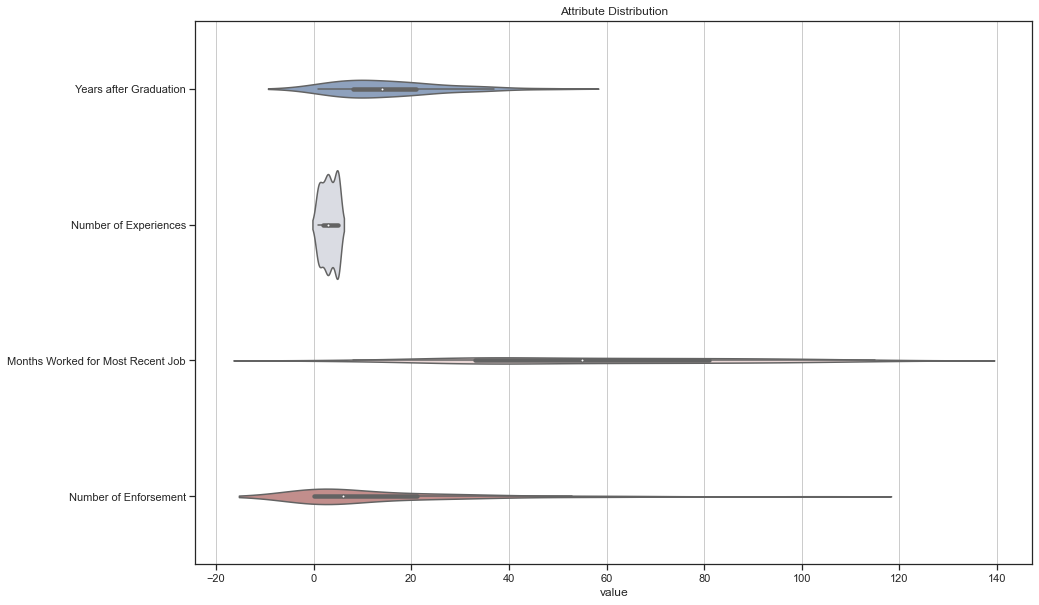

In [13]:
num_cols = ["Years after Graduation", "Number of Experiences",
            "Months Worked for Most Recent Job", "Number of Enforsement"]


print("\n\nSummary for", ", ".join(num_cols), "\n------------------------------")
display(df_raw[num_cols].describe())

boxplot(df_raw[num_cols])



Summary for Number of Connections 
------------------------------


,Number of Connections
count,90.000000
mean,154.455556
std,145.704037
min,1.000000
25%,42.500000
50%,111.500000
75%,224.750000
max,500.000000


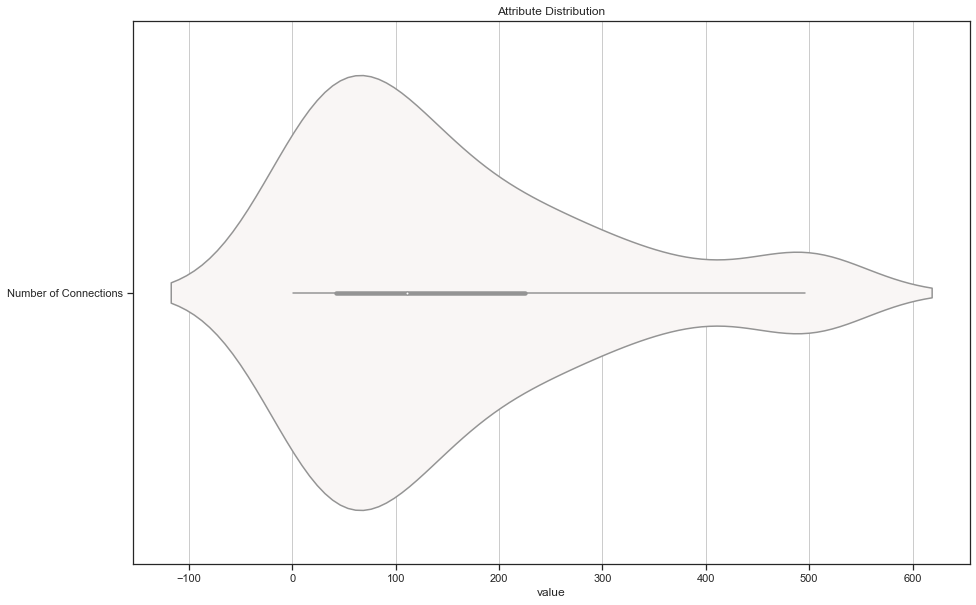

In [14]:
num_cols = ['Number of Connections']
print("\n\nSummary for", ", ".join(num_cols), "\n------------------------------")
display(df_raw[num_cols].describe())

boxplot(df_raw[num_cols])

### Data Cleaning

In [15]:
# Drop rows if "Social profiles" = nan
df_raw.dropna(subset = ["Social profiles"], inplace = True)


In [16]:
df = df_raw.copy()

for idx, accpt in enumerate(df_raw["Linkedin Connect"]):
    if accpt == "v":
        df["Linkedin Connect"].iloc[idx] = "Yes"
    else:
        df["Linkedin Connect"].iloc[idx] = "No"

for idx, accpt in enumerate(df_raw["Accepted"]):
    if accpt == "v":
        df["Accepted"].iloc[idx] = 1
    else:
        df["Accepted"].iloc[idx] = 0
        
for idx, accpt in enumerate(df_raw["Message Sent"]):
    if accpt == "v":
        df["Message Sent"].iloc[idx] = "Yes"
    else:
        df["Message Sent"].iloc[idx] = "No"

for idx, accpt in enumerate(df_raw["image"]):
    if not accpt:
        df["image"].iloc[idx] = "Yes"
    else:
        df["image"].iloc[idx] = "No"
        
for idx, accpt in enumerate(df_raw["activity"]):
    if not accpt:
        df["activity"].iloc[idx] = "Yes"
    else:
        df["activity"].iloc[idx] = "No"

/Users/shiqi_ning/anaconda3/envs/Python3_7/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [17]:
df["Time Accepted"].fillna(value = "Unaccepted", inplace = True)
df["Number of Connections"].fillna(value = 0, inplace = True)
df["City"].fillna(value = "Unknown", inplace = True)
df["State"].fillna(value = "Unknown", inplace = True)
df["Schools"].fillna(value = "Unknown", inplace = True)
df["Number of Experiences"].fillna(value = 0, inplace = True) 
df["Volunteer Exp"].fillna(value = 0, inplace = True) 
df["Number of Enforsement"].fillna(value = 0, inplace = True) 

 

### Feature Generation

In [18]:
# Create bins
df['Yrs Aft Graduation'] = pd.cut(x = df["Years after Graduation"], bins=[0, 5, 15, 30, 50], 
                                  labels=['Below 5 Yrs', '5 - 15 Yrs', '15 - 30 Yrs', '30+ Yrs'])

df['Yrs Aft Graduation']=(df['Yrs Aft Graduation'].cat.add_categories('Unknown').fillna('Unknown'))


In [19]:
df['Months Worked'] = pd.cut(x = df["Months Worked for Most Recent Job"], bins=[0, 12, 36, 60, 120], 
                                  labels=['Below 12 Months', '12 - 36 Months', '36 - 60 Months', '60+ Months'])
df['Months Worked']=(df['Months Worked'].cat.add_categories('Unknown').fillna('Unknown'))


In [20]:
import datetime

dates = []
for date in df["Date Sent"]:
    month, day = str(date).split(".")
    result = '{}/{}/2020'.format(int(month), int(day))
    dates.append(datetime.datetime.strptime(result, '%m/%d/%Y'))
    
df["Day Sent"] = [date.weekday() for date in dates] # Monday = 0

In [21]:
df.drop(["Name", "Message Sent", "Social profiles", "Date Sent", "Linkedin Connect", "Time Accepted", 
         "Gender of Sender", "Schools", 'Years after Graduation', 
         'Months Worked for Most Recent Job'], axis = 1, inplace = True)

In [22]:
df.head()

,Time Sent,Accepted,Number of Connections,City,State,Number of Experiences,Volunteer Exp,Number of Enforsement,image,activity,Yrs Aft Graduation,Months Worked,Day Sent
0,10 - 10:45,0,0.0,Unknown,Unknown,0.0,No,0.0,No,No,Unknown,Unknown,1
1,10 - 10:45,0,23.0,Canyon Country,California,1.0,No,11.0,No,No,Unknown,Unknown,1
2,10 - 10:45,0,482.0,Greater Los Angeles Area,California,4.0,Yes,10.0,No,No,Unknown,36 - 60 Months,1
3,6PM-9PM,1,2.0,Greater Los Angeles Area,California,1.0,No,0.0,No,No,Unknown,Unknown,0
4,10 - 10:45,0,64.0,Ventura,California,4.0,No,35.0,No,No,30+ Yrs,60+ Months,1


## Analytics

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

# If failed, try conda install -c conda-forge shap
import shap


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 92
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Time Sent              93 non-null     object  
 1   Accepted               93 non-null     object  
 2   Number of Connections  93 non-null     float64 
 3   City                   93 non-null     object  
 4   State                  93 non-null     object  
 5   Number of Experiences  93 non-null     float64 
 6   Volunteer Exp          93 non-null     object  
 7   Number of Enforsement  93 non-null     float64 
 8   image                  93 non-null     object  
 9   activity               93 non-null     object  
 10  Yrs Aft Graduation     93 non-null     category
 11  Months Worked          93 non-null     category
 12  Day Sent               93 non-null     int64   
dtypes: category(2), float64(3), int64(1), object(7)
memory usage: 9.3+ KB


In [25]:
df.Accepted.value_counts()

0    78
1    15
Name: Accepted, dtype: int64

## Dealing with Imbalanced Data

In [27]:
categorical_cols = ['Time Sent', 'City', 'State', 'image', 'activity', 
                    'Volunteer Exp', 'Yrs Aft Graduation', 'Months Worked']

#import pandas as pd
df_clean = pd.get_dummies(df, columns = categorical_cols)

In [28]:
X = df_clean[df_clean.columns[~df_clean.columns.isin(['Accepted'])]]
y = df_clean['Accepted'].astype('int')


### Random Over-Sampling

In [29]:
# class count
class_count_0, class_count_1 = df['Accepted'].value_counts()

# Separate class
class_0 = df[df['Accepted'] == 0]
class_1 = df[df['Accepted'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (78, 13)
class 1: (15, 13)


total class of 1 and 0:
 1    78
0    78
Name: Accepted, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

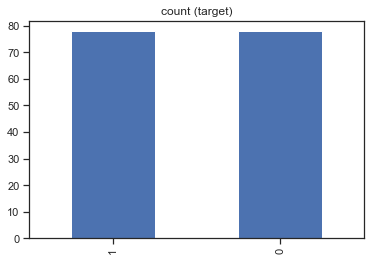

In [30]:
class_1_over = class_1.sample(class_count_0, replace = True)

test_over = pd.concat([class_1_over, class_0], axis = 0)

print("total class of 1 and 0:\n",test_over['Accepted'].value_counts())
# plot the count after under-sampeling
test_over['Accepted'].value_counts().plot(kind='bar', title='count (target)')

### Balance data with the imbalanced-learn python module

In [31]:
# import library
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


In [32]:
ros = RandomOverSampler(random_state = 12)# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_ros))

original dataset shape: Counter({0: 78, 1: 15})
Resample dataset shape Counter({0: 78, 1: 78})


### SMOTE

In [33]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 78, 1: 15})
Resample dataset shape Counter({0: 78, 1: 78})


In [34]:
X, y = x_smote, y_smote

## Prepare Train Test Data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 12)

### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(random_state = 12, max_iter = 200)
# Train on the training data
log_reg.fit(X_train, y_train)
log_reg_predict = log_reg.predict(X_test)

lr_auc = roc_auc_score(y_test, log_reg_predict)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


### Random Forest

In [55]:
# First Run
# min_samples_split=2,
# min_samples_leaf=1, 
# n_estimators=10
rf = RandomForestClassifier(n_estimators = 50, random_state = 12)
rf.fit(X_train, y_train)

rf_pred = rf.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_pred)

In [56]:
# Train on the training data, after refinement
opt_rf_model = RandomForestClassifier(n_estimators = 100, 
                                      min_samples_split = 5, 
                                      min_samples_leaf = 5, 
                                      #n_jobs = -1, 
                                      random_state = 12) 
opt_rf_model.fit(X_train, y_train)
opt_RF_pred = opt_rf_model.predict_proba(X_test)[:, 1]
opt_rf_auc = roc_auc_score(y_test, opt_RF_pred)

In [57]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x = fi_df['feature_importance'][0:15], y = fi_df['feature_names'][0:15])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

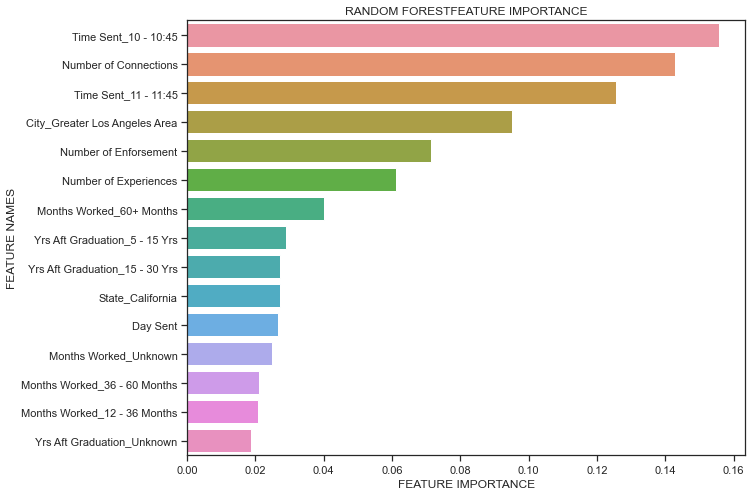

In [58]:
plot_feature_importance(rf.feature_importances_, X.columns, 'RANDOM FOREST')


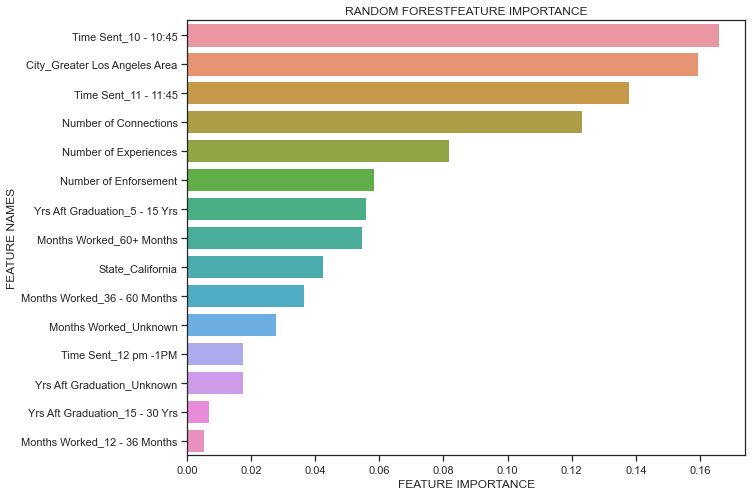

In [59]:
plot_feature_importance(opt_rf_model.feature_importances_, X.columns, 'RANDOM FOREST')


### Permutation feature importance
This approach directly measures feature importance by observing how random re-shuffling (thus preserving the distribution of the variable) of each predictor influences model performance.

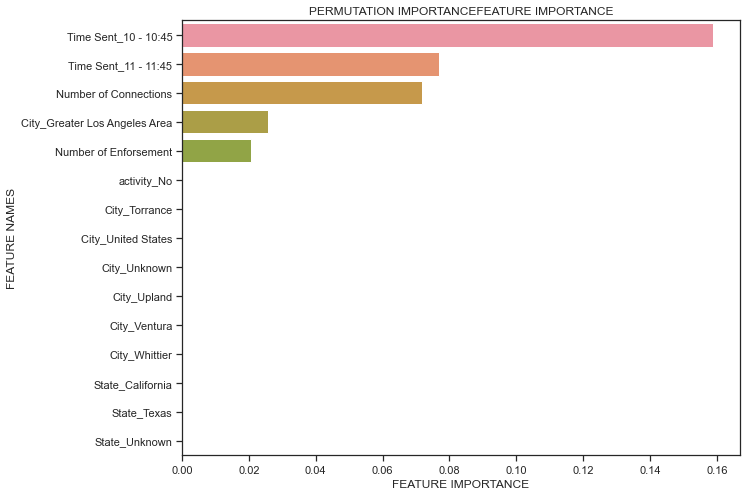

In [60]:
perm_importance = permutation_importance(rf, X_test, y_test)
plot_feature_importance(perm_importance.importances_mean, X.columns, 'PERMUTATION IMPORTANCE')


### LGB

In [61]:
import re
X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))


In [62]:
from lightgbm import LGBMClassifier
LGB_clf = LGBMClassifier(n_estimators = 100, 
                         boosting_type = 'gbdt', 
                         objective = 'binary', 
                         metric = 'binary_logloss')
LGB_clf.fit(X_train, y_train)
LGB_clf_pred = LGB_clf.predict_proba(X_test)[:, 1]

lgb_auc =roc_auc_score(y_test, LGB_clf_pred)

### Shap

In [63]:
#shap_values = explainer.shap_values(X_test)
#shap.summary_plot(shap_values, X_test)


In [64]:
explainer = shap.TreeExplainer(opt_rf_model)
shap_values = explainer.shap_values(X_train)

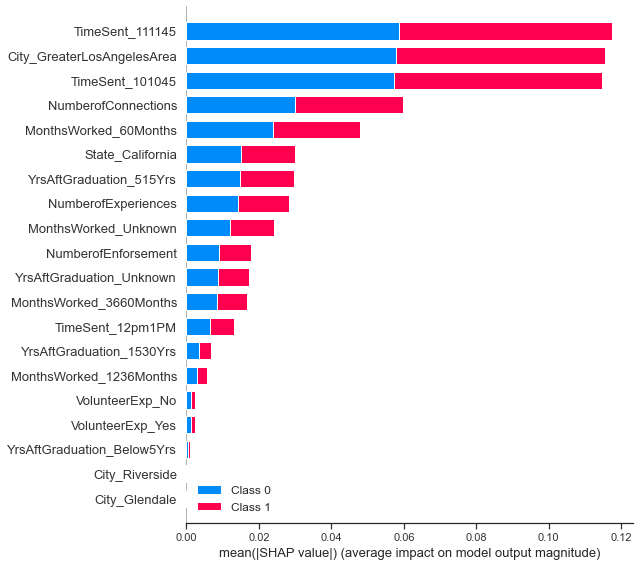

In [65]:
#shap.summary_plot(shap_values[1], X_train)#, plot_type="bar"
shap.summary_plot(shap_values, X_train)#, plot_type="bar"


In [66]:
# print the JS visualization code to the notebook
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_train.iloc[0,:])


In [67]:
shap.force_plot(explainer.expected_value[1], shap_values[1][:200,:], X_train.iloc[:200,:])


In [68]:
def make_shap_waterfall_plot(shap_values, features, num_display=20):
    column_list = features.columns
    feature_ratio = (np.abs(shap_values).sum(0) / np.abs(shap_values).sum()) * 100
    column_list = column_list[np.argsort(feature_ratio)[::-1]]
    feature_ratio_order = np.sort(feature_ratio)[::-1]
    cum_sum = np.cumsum(feature_ratio_order)
    column_list = column_list[:num_display]
    feature_ratio_order = feature_ratio_order[:num_display]
    cum_sum = cum_sum[:num_display]
    
    num_height = 0
    if (num_display >= 20) & (len(column_list) >= 20):
        num_height = (len(column_list) - 20) * 0.4
        
    fig, ax1 = plt.subplots(figsize=(8, 8 + num_height))
    ax1.plot(cum_sum[::-1], column_list[::-1], c='blue', marker='o')
    ax2 = ax1.twiny()
    ax2.barh(column_list[::-1], feature_ratio_order[::-1], alpha=0.6)
    
    ax1.grid(True)
    ax2.grid(False)
    ax1.set_xticks(np.arange(0, round(cum_sum.max(), -1)+1, 5)) #10
    ax2.set_xticks(np.arange(0, round(feature_ratio_order.max(), -1)+1, 5)) #10
    ax1.set_xlabel('Cumulative Ratio')
    ax2.set_xlabel('Composition Ratio')
    ax1.tick_params(axis="y", labelsize=13)
    plt.ylim(-1, len(column_list))
    


How to understand your customers and interpret a black box model

https://medium.com/python-in-plain-english/random-forest-classifier-and-shap-how-to-understand-your-customers-and-interpret-a-black-box-model-6166d86820d9


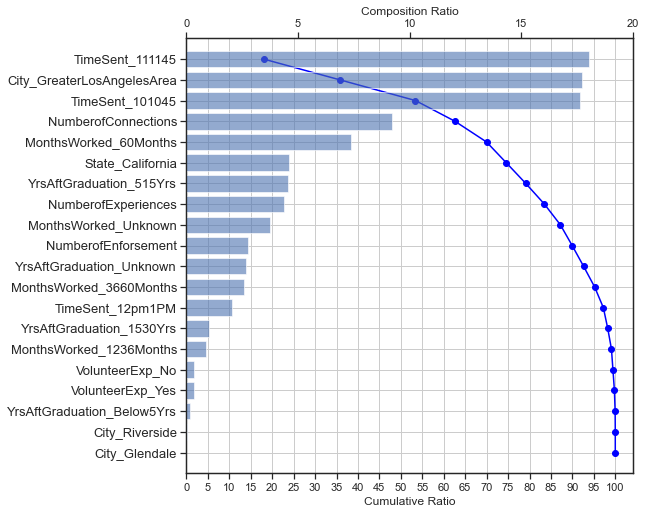

In [69]:
# Shap waterfall plot
make_shap_waterfall_plot(shap_values[1], X_train)

## ROC Curve

In [70]:
d = {'1. Logistic Regression': [lr_auc], 
     '2. Default Random Forest': [rf_auc], 
     '4. Default Light GBM': [lgb_auc], 
     '3. Tuned Random Forest': [opt_rf_auc]}
d_i = ['ROC AUC Score']
df_results = pd.DataFrame(data = d, index = d_i)
df_results = df_results.transpose()
df_results

,ROC AUC Score
1. Logistic Regression,0.923077
2. Default Random Forest,0.915680
4. Default Light GBM,0.928994
3. Tuned Random Forest,0.917160


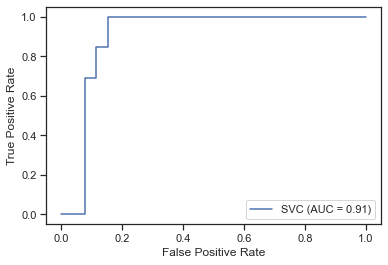

In [71]:
svc = SVC(random_state = 12)
svc.fit(X_train, y_train)
svc_disp = plot_roc_curve(svc, X_test, y_test)
#plt.show()

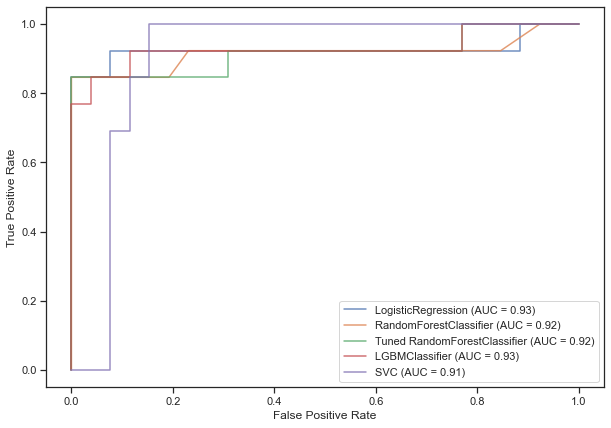

In [73]:
plt.figure(figsize=(10, 7))

ax = plt.gca()
lr_disp = plot_roc_curve(log_reg, X_test, y_test, ax = ax, alpha = 0.8)
rf_disp = plot_roc_curve(rf, X_test, y_test, ax = ax, alpha = 0.8)
opt_rf_disp = plot_roc_curve(opt_rf_model, X_test, y_test, ax = ax, alpha = 0.8, name = "Tuned RandomForestClassifier")
lgb_disp = plot_roc_curve(LGB_clf, X_test, y_test, ax = ax, alpha = 0.8)

svc_disp.plot(ax = ax, alpha = 0.8)
plt.show()